# Info 3950 s5

In [1]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import nltk
from nltk.corpus import gutenberg

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import Counter

## 1A.

In [2]:
shf = [fileid for fileid in gutenberg.fileids() if fileid.startswith('shakespeare')]
shf

['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt']

In [3]:
#now try four authors
shw = [w.lower() for fileid in shf for w in gutenberg.words(fileid) if w[0].isalpha()]
mpw = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
auw= [w.lower() for w in gutenberg.words('austen-persuasion.txt') if w[0].isalpha()]
mdw_all= [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()]
len(shw),len(mpw),len(auw),len(mdw_all) #numbers of words

(69340, 80493, 84121, 218365)

In [4]:
mdw = mdw_all[:80000] #truncate moby dick words to 16 5k pieces

In [5]:
fdist=Counter(shw + mpw + auw + mdw) #for all four
top50,_=zip(*fdist.most_common(50)) #just use top 50 from combined both
print (top50)

('the', 'and', 'of', 'to', 'in', 'a', 'i', 'that', 'his', 'with', 'it', 'he', 'not', 'but', 'as', 'was', 'for', 'be', 'all', 'you', 'is', 'her', 'had', 'him', 'this', 'my', 's', 'on', 'by', 'so', 'from', 'at', 'or', 'she', 'me', 'what', 'they', 'their', 'which', 'no', 'have', 'there', 'now', 'more', 'will', 'were', 'we', 'them', 'thou', 'when')


In [6]:
M=[]
for corp in [shw,mpw,auw,mdw]:
  for i in range(0,len(corp)-4999,5000):  # 13 blocks of shakespeare, 16 of milton, austen,moby
    fdist = Counter(corp[i:i+5000])
    M.append([fdist[w] for w in top50])
M = np.array(M).astype(np.float64)
M.shape

(61, 50)

`M[:13]` gives the first 13 rows of data (each 50 points).
`M[:13].T` (T=transpose) gives 50 rows of data, each 13 points.
According to [plot.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
"if x and/or y is 2-dimensional, then the corresponding columns will be plotted".
In this case we're giving no x value, so it defaults to 0,1,...,N-1 , and the columns of the y data are the N=50 datapoints to plot. (try, for example `plt.plot(M[:3].T)`).
Then plot them successively in different colors:

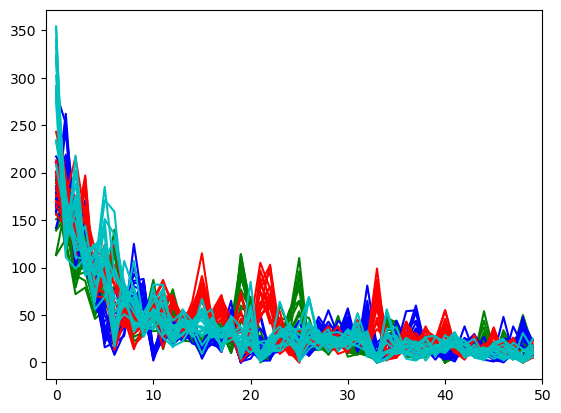

In [7]:
#shakespeare blocks in blue, milton green, austen red, melville cyan
#plt.figure(figsize=(8,6))
plt.plot(M[:13].T,'g', M[13:29].T, 'b',M[29:45].T, 'r',M[45:].T, 'c')
plt.xlim(-1,50);

In [8]:
#center the data on zero, and normalize standard deviation
scaler = preprocessing.StandardScaler()
M_scaled = scaler.fit_transform(M)

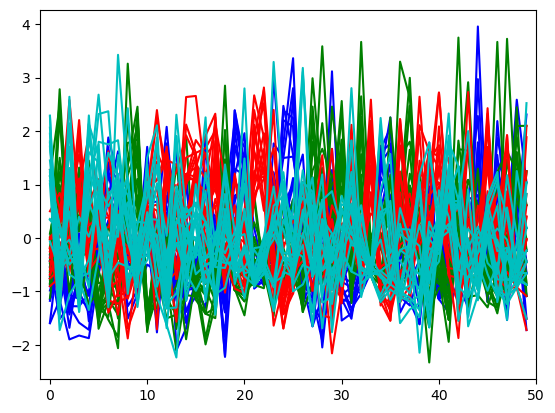

In [9]:
#shakespeare blocks in blue, milton green, austen red, melville cyan
#plt.figure(figsize=(8,6))
plt.plot(M_scaled[:13].T, 'b', M_scaled[13:29].T, 'g',
         M_scaled[29:45].T, 'r', M_scaled[45:].T, 'c')
plt.xlim(-1,50);

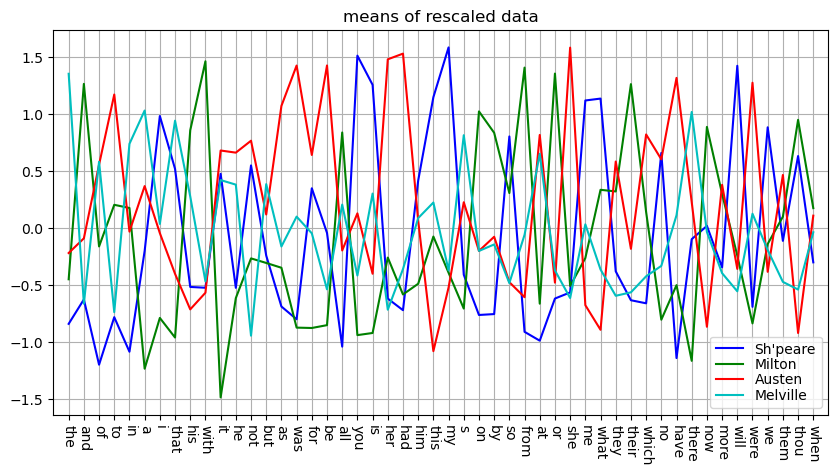

In [10]:
plt.figure(figsize=(10,5))
#shakespeare blocks in blue, milton green, austen red, melville cyan
plt.plot(M_scaled[:13].mean(0), 'b', M_scaled[13:29].mean(0), 'g',
         M_scaled[29:45].mean(0), 'r', M_scaled[45:].mean(0),'c')
plt.xticks(range(50),top50,rotation=270)
plt.xlim(-1,50)
plt.grid(True)
plt.title('means of rescaled data')
plt.legend(['Sh\'peare','Milton','Austen','Melville'],fontsize=10, labelspacing=.1);

In [11]:
pca = PCA(n_components=3)  #find three
M_new = pca.fit_transform(M_scaled)
#V = pca.components_  # these are the three principle vectors
#for i,v in enumerate(V): print ('v_{}:'.format(i),v)
evr=pca.explained_variance_ratio_
print ('explained variance ratio:', evr, sum(evr))  #eigenvalues, scaled to sum to 1

explained variance ratio: [0.24456369 0.2162239  0.10819886] 0.5689864541888895


(First three principal components give 56.9% of the variance)

In [12]:
km4 = KMeans(4, random_state=0).fit(M_new)
means = km4.cluster_centers_

In [13]:
M_new.shape

(61, 3)

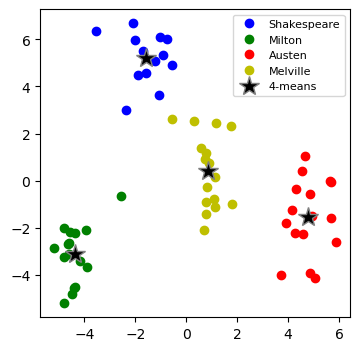

In [14]:
fig=plt.figure(figsize=(4,4))
plt.plot(*M_new[:13,:2].T, 'ob', label='Shakespeare')
plt.plot(*M_new[13:29,:2].T, 'og', label='Milton')
plt.plot(*M_new[29:45,:2].T, 'or', label='Austen')
plt.plot(*M_new[45:,:2].T, 'oy', label='Melville')
plt.plot(*means[:,:2].T, '*k', ms=15, mec='gray', label='4-means')
plt.legend(fontsize=8);

In [15]:
#alternate way to plot same thing
from matplotlib.lines import Line2D #to make custom legend handles
def lmarker(c, m='o', ms=7): return Line2D([0], [0], marker=m, c='none', mfc=c, mec='none', ms=ms)

clrs= list(13*'b' + 16*'g' + 16*'r' + 16*'y') #Shakespeare, Milton, Austen, Melville

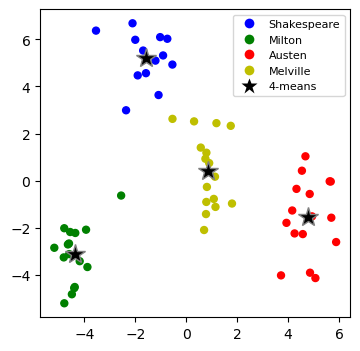

In [16]:
fig=plt.figure(figsize=(4,4))
plt.scatter(*M_new.T[:2], c=clrs, s=25)
plt.plot(*means.T[:2], '*k', ms=15, mec='gray')
plt.legend([lmarker(c) for c in list('bgry')] + [lmarker('k', '*', 12)],
           ['Shakespeare', 'Milton', 'Austen', 'Melville', '4-means'], fontsize=8);

In [17]:
# words sorted along three principal axes
for i in range(3):
    print(i,np.array(top50)[pca.components_[i].argsort()])

0 ['thou' 'with' 'now' 'from' 'or' 'what' 'their' 'this' 'his' 'and' 'so'
 'on' 'me' 'by' 'my' 'all' 'will' 'we' 'when' 'more' 'is' 'they' 'in'
 'them' 'i' 'you' 'him' 'that' 'the' 'but' 'not' 'which' 's' 'to' 'of'
 'no' 'for' 'he' 'there' 'as' 'a' 'her' 'at' 'it' 'have' 'she' 'be' 'had'
 'were' 'was']
1 ['their' 'from' 'and' 'by' 'of' 'all' 'on' 'in' 'which' 'with' 'or' 'to'
 'they' 'his' 'have' 'her' 'had' 'as' 'them' 'she' 'the' 'were' 'more'
 'at' 'was' 'when' 'he' 'be' 'now' 's' 'thou' 'but' 'a' 'so' 'for' 'not'
 'there' 'him' 'we' 'no' 'it' 'what' 'that' 'this' 'will' 'me' 'is' 'i'
 'my' 'you']
2 ['not' 'to' 'her' 'she' 'be' 'they' 'so' 'and' 'will' 'you' 'thou' 'them'
 'no' 'had' 'more' 'my' 'as' 'we' 'which' 'what' 'their' 'for' 'i' 'with'
 'or' 'when' 'was' 'me' 'have' 'were' 'now' 'on' 'him' 'by' 'but' 'from'
 'all' 'it' 'is' 'he' 'this' 'at' 'his' 'of' 's' 'that' 'there' 'in' 'a'
 'the']


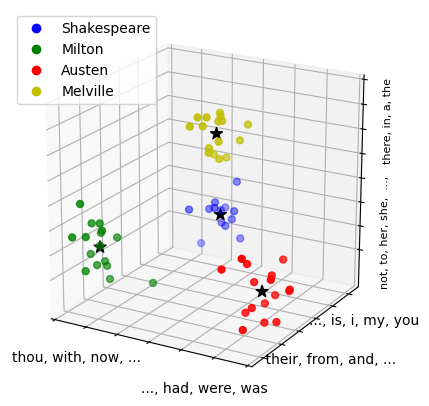

In [18]:
fig=plt.figure(figsize=(5,5))
#ax=fig.gca(projection='3d', elev=20)
ax = fig.add_subplot(111, projection='3d', elev=20)
ax.set_box_aspect((1,1,1))

ax.scatter(*M_new.T, c=clrs, s=25)

ax.scatter(*means.T, color='k', marker='*', s=80, alpha=1)

plt.xlim(-6, 6), plt.ylim(-5, 7)

for c,l in zip('bgry',['Shakespeare','Milton','Austen','Melville']):
    ax.plot([],[],'o',c=c,label=l) #hack to greate legend
ax.legend(loc='upper left')

plt.xticks(range(-6,7,2), ['','thou, with, now, ...','','','','..., had, were, was',''])
plt.yticks(range(-4,7,2), ['','','       their, from, and, ...','','','..., is, i, my, you'])
ax.set_zticks(range(-2,6), ['']*3+['not, to, her, she,  ...,'] + [' ']*3 + ['there, in, a, the'], fontsize=8, rotation=90)
ax.zaxis.set_rotate_label(True)
#plt.savefig('/tmp/smam.pdf')
None;

In [19]:
def doplot(fig_num, elev=30, azim=-60):
    ax = fig.add_subplot(fig_num, projection='3d',elev=elev, azim=azim)
    ax.set_box_aspect((1,1,1))
    
    for c,l in zip('bgry', ['Shakespeare','Milton','Austen','Melville']):
        ax.plot([],[],'o',c=c, label=l) #hack to greate legend
    ax.legend(loc='upper left', fontsize=9)

    ax.scatter(*M_new.T, c=clrs, s=25)
    ax.scatter(*means.T, color='k',marker='*',s=100,alpha=1)

    plt.xlim(-6, 6), plt.ylim(-5, 7)

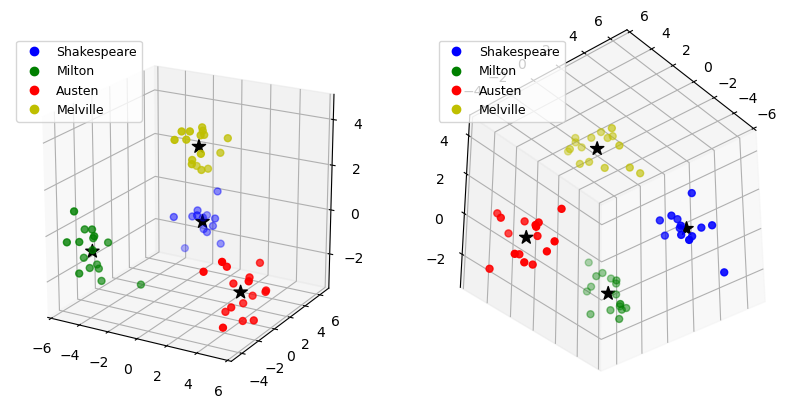

In [20]:
#two different views of same
fig=plt.figure(figsize=(10,6))
doplot(121, elev=20)
doplot(122, elev=-35, azim=40)

## 1B.

In [21]:
#mpr = milton paradise regained
from urllib.request import urlopen
mpr_text = urlopen('https://www.gutenberg.org/cache/epub/58/pg58.txt').read().decode('utf-8')

In [22]:
#find beginning and end to strip off gutenberg stuff
mpr_text.index('\r\n'*5 + 'Paradise Regained'), mpr_text.index(5*'\r\n' + '*** END OF THE PROJECT GUTENBERG')

(767, 93590)

In [23]:
#tokenize same as other nltk corpora
mpr_words = nltk.word_tokenize(mpr_text[767:93590])
print (mpr_words[:20], mpr_words[-20:])

['Paradise', 'Regained', 'by', 'John', 'Milton', 'Contents', 'THE', 'FIRST', 'BOOK', 'THE', 'SECOND', 'BOOK', 'THE', 'THIRD', 'BOOK', 'THE', 'FOURTH', 'BOOK', 'THE', 'FIRST'] ['on', 'his', 'way', 'with', 'joy', '.', 'He', ',', 'unobserved', ',', 'Home', 'to', 'his', 'mother', '’', 's', 'house', 'private', 'returned', '.']


In [24]:
len(mpr_words)

19331

In [25]:
#now add in more shakespeare plays
from nltk.corpus import shakespeare
print (shakespeare.fileids())

['a_and_c.xml', 'dream.xml', 'hamlet.xml', 'j_caesar.xml', 'macbeth.xml', 'merchant.xml', 'othello.xml', 'r_and_j.xml']


In [26]:
T=[]
more_shwords=[]
for fileid in shakespeare.fileids():
    if fileid in ('hamlet.xml', 'j_caesar.xml', 'macbeth.xml'): continue  #already in training data
    more_shwords += shakespeare.words(fileid)
more_shwords = [w.lower() for w in more_shwords if w[0].isalpha()]
for i in range(0,len(more_shwords)-4999,5000):  # 13 blocks of shakespeare, 16 of milton, austen,moby
    fdist = Counter(more_shwords[i:i+5000])
    T.append([fdist[w] for w in top50])
len(T) # 24 of them

24

In [27]:
mpr = [w.lower() for w in mpr_words if w[0].isalpha()]
for i in range(0,len(mpr)-4999,5000):  # milton paradise regained
    fdist = Counter(mpr[i:i+5000])
    T.append([fdist[w] for w in top50])
len(T) # 3 more

27

In [28]:
aue= [w.lower() for w in gutenberg.words('austen-emma.txt') if w[0].isalpha()]
aus= [w.lower() for w in gutenberg.words('austen-sense.txt') if w[0].isalpha()]
for i in range(0,len(aus+aue)-4999,5000): #austen
    fdist = Counter((aus+aue)[i:i+5000])
    T.append([fdist[w] for w in top50])
len(T) #56 more

83

In [29]:
for i in range(0,len(mdw_all[80000:])-4999,5000):  #rest of melville
    fdist = Counter(mdw_all[i+80000:i+85000])
    T.append([fdist[w] for w in top50])
len(T) #27 more

110

In [30]:
T_new = pca.transform(scaler.transform(T))
T_pred = km4.predict(T_new)
T_pred, Counter(T_pred)

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int32),
 Counter({3: 24, 2: 3, 0: 56, 1: 27}))

In [31]:
M_pred= km4.predict(M_new)
print ('Training clusters')
print ('Sh = {}\nMil = {}\nAus = {}\nMel = {}'.format(M_pred[:13], M_pred[13:29], M_pred[29:45],M_pred[45:]))

Training clusters
Sh = [3 3 3 3 3 3 3 3 3 3 3 3 3]
Mil = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Aus = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mel = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [32]:
#all of the test points classify with training points of original author, no errors
print ('Test clusters')
print ('5 Shakespeare plays:',T_pred[:24])
print ('Milton Paradise Regained:',T_pred[24:27])
print ('2 more Austen books:', T_pred[27:83])
print ('Melville rest of Moby Dick:', T_pred[83:])

Test clusters
5 Shakespeare plays: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Milton Paradise Regained: [2 2 2]
2 more Austen books: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Melville rest of Moby Dick: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
clrs = list(13*'b' + 16*'g' + 16*'r' + 16*'y')
testclrs = list(24*'b' + 3*'g' + 56*'r' + 27*'y')

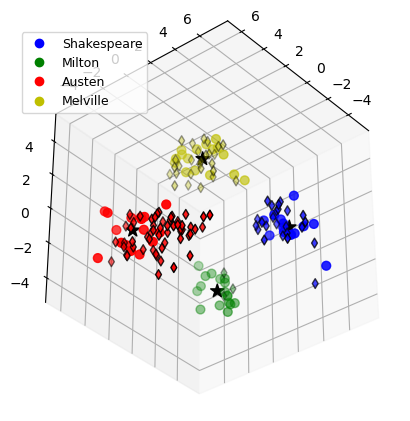

In [34]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d',elev=-35,azim=40)
ax.set_box_aspect((1,1,1))

for c,l in zip('bgry', ['Shakespeare','Milton','Austen','Melville']):
    ax.plot([],[],'o',c=c, label=l) #hack to greate legend
ax.legend(loc='upper left', fontsize=9)

ax.scatter(*M_new.T, c=clrs, s=40)
ax.scatter(*means.T, color='k', marker='*', s=100, alpha=1)

ax.scatter(*T_new.T, s=25, c=testclrs, ec='k', marker='d');

for fun, an animation

In [35]:
def doplota(fig_num, elev=30, azim=-60):

    ax.scatter(*M_new.T, c=clrs, s=25)
    ax.scatter(*means.T, color='k', marker='*', s=80, alpha=1)
    ax.scatter(*T_new.T, s=25, c=testclrs, ec='k', marker='d')

    ax.set_xlim(-6, 6), ax.set_ylim(-5, 7)
    ax.elev=elev
    ax.azim=azim

    for c in 'bgry': ax.plot([],[],'o',c=c) #hack to greate legend
    ax.legend(['Shakespeare','Milton','Austen','Melville'],numpoints=1,fontsize=10)
    
    
#    ax.plot(*Unew_new.T, 'C1.-')

In [36]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [37]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1)) #if necessary

def animate(f):  #takes frame num as arg
    if f>0: ax.clear()
    print (f, end=' ')
    doplota(111, elev=20, azim=-69+3*f)
#    

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, #init_func=init,
                               frames=9, interval=200, blit=False)

plt.close(fig)
HTML(anim.to_jshtml(default_mode='reflect'))

0 0 1 2 3 4 5 6 7 8 

## 1C.

In [38]:
unk1_text = open('ps5text1.txt').read()
unk1_words = nltk.word_tokenize(unk1_text)
len(unk1_text), len(unk1_text.split()), len(unk1_words)

(1043992, 175604, 208888)

In [39]:
U1 = []
unk1 = [w.lower() for w in unk1_words if w[0].isalpha()]
for i in range(0,len(unk1)-4999,5000):
    fdist = Counter(unk1[i:i+5000])
    U1.append([fdist[w] for w in top50])
len(U1) #35

35

In [40]:
U1_new = pca.transform(scaler.transform(U1))
U1_pred = km4.predict(U1_new)
for i,n in Counter(U1_pred).most_common():
    print ('total of {} blocks of cluster {} ({}),'.format(n,i,'x Melville' if i==2 else 'x Milton'))
print('in this sequence:', U1_pred)

total of 27 blocks of cluster 1 (x Milton),
total of 8 blocks of cluster 2 (x Melville),
in this sequence: [1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1]


So five of Melville, two Milton, six Melville, two Milton, five Melville, two Milton, six Melville, two Milton, five Melville.

The "unknown text" was an interleaved merger of Melville's [White Jacket](http://www.gutenberg.org/ebooks/10712) and Milton's collected [Poetical Works](http://www.gutenberg.org/ebooks/1745) (with Paradise Lost, Paradise Regained, and some sonnets in Italian removed)

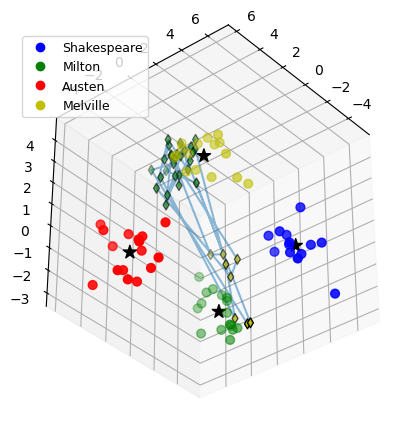

In [41]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d',elev=-35,azim=40) #-60
ax.set_box_aspect((1,1,1))

for c,l in zip('bgry',['Shakespeare','Milton','Austen','Melville']):
    ax.plot([],[],'o',c=c,label=l) #hack to greate legend
ax.legend(loc='upper left', fontsize=9)

ax.scatter(*M_new.T, c=clrs, s=40)
ax.scatter(*means.T, color='k', marker='*', s=100, alpha=1)

unkclrs = np.array(list('bgyr'))[U1_pred]
ax.scatter(*U1_new.T, s=25, c=unkclrs, ec='k', marker='d')

ax.plot(*U1_new.T, alpha=.5)

None;

## 1D.

In [42]:
chimneys_url = 'https://www.gutenberg.org/cache/epub/65238/pg65238.txt'
chimneys = urlopen(chimneys_url).read().decode('utf-8')
agw = [w.lower() for w in nltk.word_tokenize(chimneys[897:439351]) if w[0].isalpha()]

In [43]:
' '.join(agw[:6]), '...', ' '.join(agw[-6:])

('agatha christie the secret of chimneys',
 '...',
 'been a great little old week')

In [44]:
fdist=Counter(shw + mpw + auw + mdw + agw) #for all five
top60,_=zip(*fdist.most_common(60)) #now use top 60 from combined
print (top60)

('the', 'and', 'to', 'of', 'a', 'in', 'i', 'that', 'he', 'his', 'it', 'with', 'you', 'was', 'not', 'but', 'as', 'for', 'be', 'all', 'is', 's', 'had', 'him', 'her', 'on', 'this', 'at', 'my', 'so', 'by', 'from', 'she', 'what', 'me', 'or', 'they', 'have', 'no', 'their', 'there', 'which', 'said', 'one', 'now', 'we', 'will', 'were', 'then', 'your', 'more', 'them', 'if', 'who', 'when', 'been', 'do', 'would', 'are', 'd')


In [45]:
print('now have in top60:', set(top60) - set(top50),'\nleaving out from top50:',set(top50) - set(top60))

now have in top60: {'d', 'said', 'would', 'who', 'then', 'your', 'been', 'are', 'do', 'one', 'if'} 
leaving out from top50: {'thou'}


In [46]:
M5=[]
for corp in [shw,mpw,auw,mdw,agw]:
  print(len(corp))
  for i in range(0,len(corp)-4999,5000):  # 13 blocks of shakespeare, 16 of milton, austen,moby, christie
    fdist = Counter(corp[i:i+5000])
    M5.append([fdist[w] for w in top60])
M5 = np.array(M5).astype(np.float64)
M5.shape

69340
80493
84121
80000
76423


(76, 60)

In [47]:
#center the data on zero, and normalize standard deviation
scaler5 = preprocessing.StandardScaler()
M5_scaled = scaler5.fit_transform(M5)

## i)

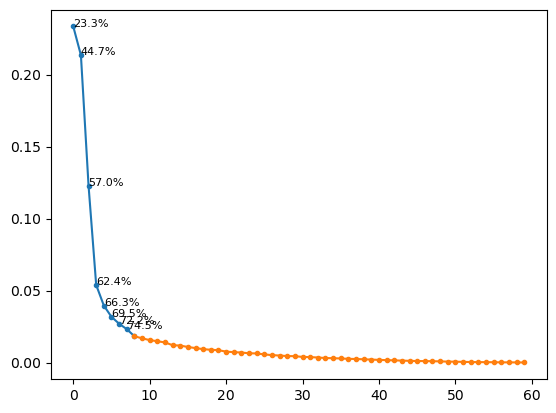

In [48]:
evr = PCA().fit(M5_scaled).explained_variance_ratio_  #get all 60 variances
plt.plot(evr[:9], '.-')
plt.plot(range(8,60), evr[8:], '.-')
for i,v in enumerate(evr.cumsum()[:8]):     
    plt.text(i,evr[i],f'{v:.1%}', fontsize=8)

It's a judgement call, and at 57% three would be sufficient, but the ones in orange all contribute below 2%, and after 8 there's a slight kink in above graph transitioning to the orange points with diminishing returns

In [49]:
pca5 = PCA(.74)  #find three
M5_new = pca5.fit_transform(M5_scaled)
#V = pca.components_  # these are the three principle vectors
#for i,v in enumerate(V): print ('v_{}:'.format(i),v)
evr5=pca5.explained_variance_ratio_
print ('explained variance ratio:', evr5, sum(evr5))  #eigenvalues, scaled to sum to 1

explained variance ratio: [0.23346343 0.2135571  0.12285684 0.05386062 0.03959388 0.03173972
 0.02698573 0.02320852] 0.7452658458123997


In [50]:
# words sorted along three principal axes
for i in range(3):
    print(i,np.array(top60)[pca5.components_[i].argsort()])

0 ['it' 'you' 'a' 'i' 'there' 'do' 'he' 'said' 'was' 'that' 's' 'at' 'one'
 'would' 'have' 'been' 'are' 'no' 'is' 'your' 'she' 'had' 'be' 'were'
 'him' 'for' 'if' 'me' 'the' 'my' 'd' 'her' 'will' 'we' 'not' 'what' 'but'
 'as' 'then' 'this' 'to' 'of' 'them' 'they' 'when' 'in' 'so' 'on' 'which'
 'more' 'who' 'now' 'his' 'all' 'by' 'or' 'and' 'with' 'their' 'from']
1 ['had' 'been' 'have' 'of' 'was' 'were' 'she' 'her' 'to' 'as' 'at' 'in'
 'which' 'be' 'would' 'they' 'one' 'the' 'he' 'all' 'by' 'a' 'them' 'on'
 's' 'there' 'more' 'who' 'their' 'and' 'said' 'from' 'for' 'it' 'but'
 'when' 'his' 'or' 'with' 'not' 'no' 'him' 'that' 'now' 'do' 'so' 'i'
 'you' 'if' 'we' 'is' 'are' 'will' 'me' 'this' 'then' 'your' 'what' 'my'
 'd']
2 ['the' 's' 'said' 'one' 'on' 'he' 'his' 'a' 'that' 'in' 'there' 'at'
 'from' 'who' 'then' 'with' 'of' 'all' 'i' 'or' 'now' 'it' 'what' 'have'
 'this' 'by' 'was' 'you' 'their' 'me' 'him' 'is' 'been' 'we' 'they' 'and'
 'but' 'are' 'do' 'when' 'them' 'd' 'were' 'my' 'if

## ii)

In [51]:
km5 = KMeans(5, random_state=0).fit(M5_new)
means5 = km5.cluster_centers_

In [52]:
#3 wrong
M5_pred = km5.predict(M5_new)
M5_pred, Counter(M5_pred) 

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 Counter({3: 13, 2: 16, 0: 16, 4: 13, 1: 18}))

Note that km5 misclassifies three of the Melville training points as Christie:

Training clusters
13 Shakespeare: [3 3 3 3 3 3 3 3 3 3 3 3 3]
16 Milton: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
16 Austen: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
16 Melville: [4 4 1 4 4 4 1 1 4 4 4 4 4 4 4 4]
16 Christie: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


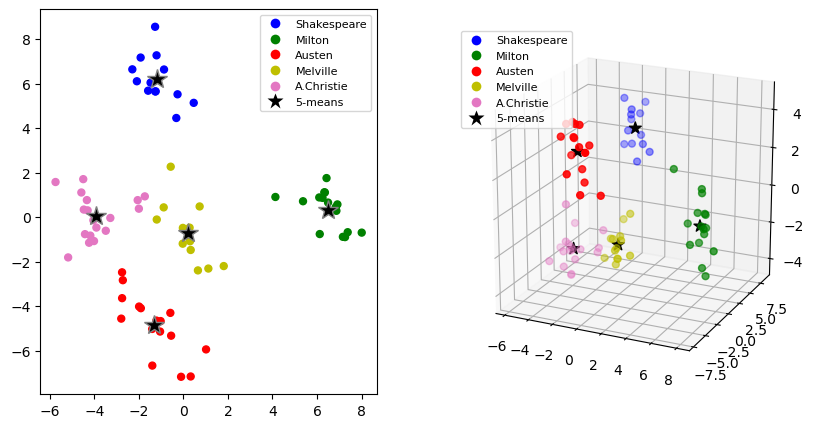

In [53]:
print ('Training clusters')
print ('13 Shakespeare:',M5_pred[:13])
print ('16 Milton:',M5_pred[13:29])
print ('16 Austen:', M5_pred[29:45])
print ('16 Melville:', M5_pred[45:61])
print ('16 Christie:', M5_pred[61:])

leg_handles = [lmarker(c) for c in list('bgry') + ['C6']] + [lmarker('k', '*', 12)]
leg_lables = ['Shakespeare', 'Milton', 'Austen', 'Melville','A.Christie', '5-means']
trclrs5 = np.array(['r', 'C6', 'g', 'b', 'y'])[M5_pred]

fig=plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(*M5_new.T[:2], c=trclrs5, s=25)
plt.plot(*means5.T[:2], '*k', ms=15, mec='gray')
plt.legend(leg_handles, leg_lables, loc='upper right', fontsize=8)
plt.gca().set_aspect(1)

ax = fig.add_subplot(122, projection='3d', azim=-65, elev=20) #, elev=60, azim=40) #50,30
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new.T[:3], c=trclrs5, s=25)
ax.scatter(*means5.T[:3], color='k', marker='*', s=80, alpha=1)
ax.legend(leg_handles, leg_lables, loc='upper left', fontsize=8);

## iii) plots

In [54]:
clrs5 = clrs + ['C6']*15
testclrs5 = testclrs + ['C6']*12
len(clrs5), len(testclrs5)

(76, 122)

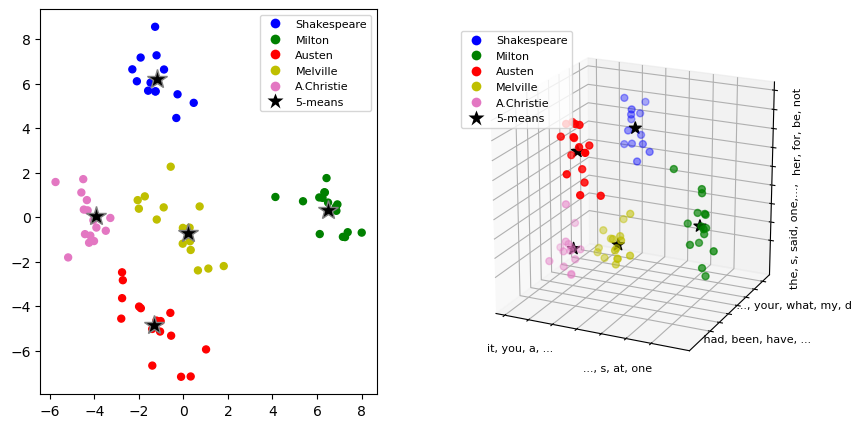

In [55]:
fig=plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(*M5_new.T[:2], c=clrs5, s=25)
plt.plot(*means5.T[:2], '*k', ms=15, mec='gray')
plt.legend(leg_handles, leg_lables, loc='upper right', fontsize=8)
plt.gca().set_aspect(1)

ax = fig.add_subplot(122, projection='3d', azim=-65, elev=20) #, elev=60, azim=40) #50,30
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new.T[:3], c=clrs5, s=25)
ax.scatter(*means5.T[:3], color='k', marker='*', s=80, alpha=1)
ax.legend(leg_handles, leg_lables, loc='upper left', fontsize=8)
plt.xticks(range(-6,7,2), ['','it, you, a, ...','','','','..., s, at, one',''], fontsize=8)
plt.yticks(range(-4,9,2), ['','','       had, been, have, ...','','','',' '*9 +'..., your, what, my, d'], fontsize=8)
ax.set_zticks(range(-3,6), ['']*3+['the, s, said, one,...,'] + [' ']*4 + ['her, for, be, not'], fontsize=8, rotation=90);


## iv)   12 more test points

In [56]:
links_url = 'https://www.gutenberg.org/cache/epub/58866/pg58866.txt'
links = urlopen(links_url).read().decode('utf-8')
links_words = [w.lower() for w in nltk.word_tokenize(links[829:373271]) if w[0].isalpha()]

' '.join(links_words[:8]), '...', ' '.join(links_words[-6:])

('the murder on the links by agatha christie',
 '...',
 'suited the action to the word')

In [57]:
T5=[]
for i in range(0,len(more_shwords)-4999,5000):  # 13 blocks of shakespeare, 16 of milton, austen,moby
    fdist = Counter(more_shwords[i:i+5000])
    T5.append([fdist[w] for w in top60])
for i in range(0,len(mpr)-4999,5000):  # milton paradise regained
    fdist = Counter(mpr[i:i+5000])
    T5.append([fdist[w] for w in top60])
for i in range(0,len(aus+aue)-4999,5000): #austen
    fdist = Counter((aus+aue)[i:i+5000])
    T5.append([fdist[w] for w in top60])
for i in range(0,len(mdw_all[80000:])-4999,5000):  #rest of melville
    fdist = Counter(mdw_all[i+80000:i+85000])
    T5.append([fdist[w] for w in top60])
for i in range(0,len(links_words)-4999,5000):  # milton paradise regained
    fdist = Counter(links_words[i:i+5000])
    T5.append([fdist[w] for w in top60])
len(T5)

122

In [58]:
T5_new = pca5.transform(scaler5.transform(T5))
T5_pred = km5.predict(T5_new)
T5_pred, Counter(T_pred)

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 Counter({3: 24, 2: 3, 0: 56, 1: 27}))

In [59]:
#all of the test points classify with training points of original author, no errors
print ('Test clusters')
print ('5 Shakespeare plays:',T5_pred[:24])
print ('Milton Paradise Regained:',T5_pred[24:27])
print ('2 more Austen books:', T5_pred[27:83])
print ('Melville rest of Moby Dick:', T5_pred[83:110])
print ('Christie Murder on Links:', T5_pred[110:])

Test clusters
5 Shakespeare plays: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Milton Paradise Regained: [2 2 2]
2 more Austen books: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Melville rest of Moby Dick: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Christie Murder on Links: [1 1 1 1 1 1 1 1 1 1 1 1]


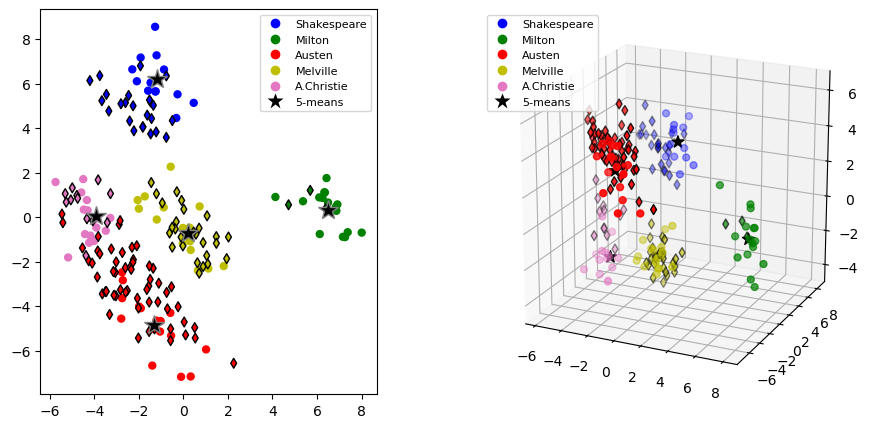

In [60]:
fig=plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(*M5_new.T[:2], c=clrs5, s=25)
plt.plot(*means5.T[:2], '*k', ms=15, mec='gray')
plt.scatter(*T5_new.T[:2], s=25, c=testclrs5, ec='k', marker='d');
plt.legend([lmarker(c) for c in list('bgry') + ['C6']] + [lmarker('k', '*', 12)],
           ['Shakespeare', 'Milton', 'Austen', 'Melville','A.Christie', '5-means'], loc='upper right', fontsize=8)
plt.gca().set_aspect(1)



ax = fig.add_subplot(122, projection='3d', azim=-65, elev=20) #, elev=60, azim=40) #50,30
ax.set_box_aspect((1,1,1))

ax.scatter(*M5_new.T[:3], c=clrs5, s=25)
ax.scatter(*means5.T[:3], color='k', marker='*', s=80, alpha=1)
ax.scatter(*T5_new.T[:3], s=25, c=testclrs5, ec='k', marker='d');

ax.legend([lmarker(c) for c in list('bgry') + ['C6']] + [lmarker('k', '*', 12)],
           ['Shakespeare', 'Milton', 'Austen', 'Melville','A.Christie', '5-means'], loc='upper left', fontsize=8)
None;

## v) ps5test2

In [61]:
unk2_text = open('ps5text2.txt').read()
unk2_words = nltk.word_tokenize(unk2_text)
len(unk2_text), len(unk2_text.split()), len(unk2_words)

(953664, 165623, 202744)

In [62]:
U2 = []
unk2 = [w.lower() for w in unk2_words if w[0].isalpha()]
for i in range(0,len(unk2)-4999,5000):
    fdist = Counter(unk2[i:i+5000])
    U2.append([fdist[w] for w in top60])
len(U2) #33

33

In [63]:
U2_scaled = scaler5.transform(U2)
U2_new = pca5.transform(U2_scaled)
U2_pred = km5.predict(U2_new)
for i,n in Counter(U2_pred).most_common():
    print ('total of {} blocks of cluster {} ({}),'.format(n,i,
            ['Austen','Christie','Milton','Shakespeare','Melville'][i]))
print('in this sequence:', U2_pred)

total of 8 blocks of cluster 3 (Shakespeare),
total of 8 blocks of cluster 0 (Austen),
total of 8 blocks of cluster 1 (Christie),
total of 6 blocks of cluster 4 (Melville),
total of 3 blocks of cluster 2 (Milton),
in this sequence: [3 3 3 3 2 2 2 0 0 0 0 0 0 0 0 4 4 4 4 4 4 1 1 1 1 1 1 1 1 3 3 3 3]


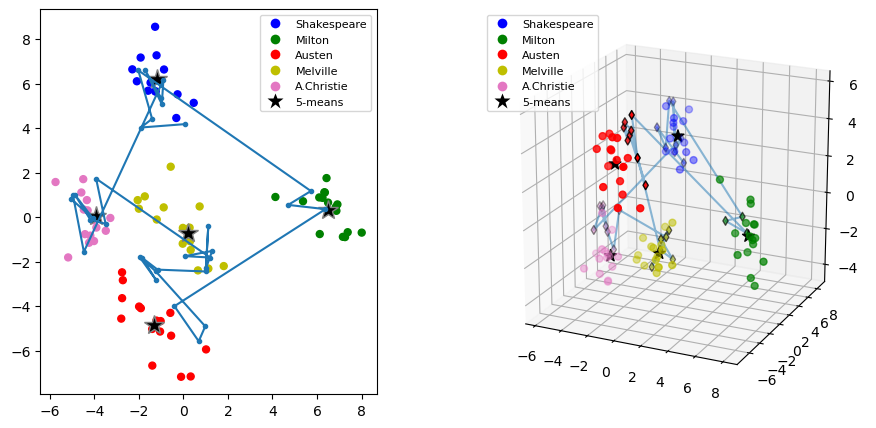

In [64]:
fig=plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(*M5_new.T[:2], c=clrs5, s=25)
plt.plot(*means5.T[:2], '*k', ms=15, mec='gray')
plt.legend([lmarker(c) for c in list('bgry') + ['C6']] + [lmarker('k', '*', 12)],
           ['Shakespeare', 'Milton', 'Austen', 'Melville','A.Christie', '5-means'], fontsize=8)
plt.plot(*U2_new.T[:2], '.-')
plt.gca().set_aspect(1)

ax = fig.add_subplot(122, projection='3d', azim=-65, elev=20) #, elev=60, azim=40) #50,30
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new.T[:3], c=clrs5, s=25)
ax.scatter(*means5.T[:3], color='k', marker='*', s=80, alpha=1)
ax.legend([lmarker(c) for c in list('bgry') + ['C6']] + [lmarker('k', '*', 12)],
           ['Shakespeare', 'Milton', 'Austen', 'Melville','A.Christie', '5-means'], loc='upper left', fontsize=8)
plt.plot(*U2_new.T[:3], '-', c='C0', alpha=.5)
ax.scatter(*U2_new.T[:3], ec='k', marker='d',
           c= np.array(['r', 'C6', 'g', 'b', 'y'])[U2_pred])

None;